<a href="https://colab.research.google.com/github/Ayush-kr-007/Feature-Engineering/blob/main/Feature_Scaling_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
df = pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])


,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [10]:
df.columns=['Class label','Alcohol','Malic acid']


In [9]:
df.head()

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Malic acid', ylabel='Density'>

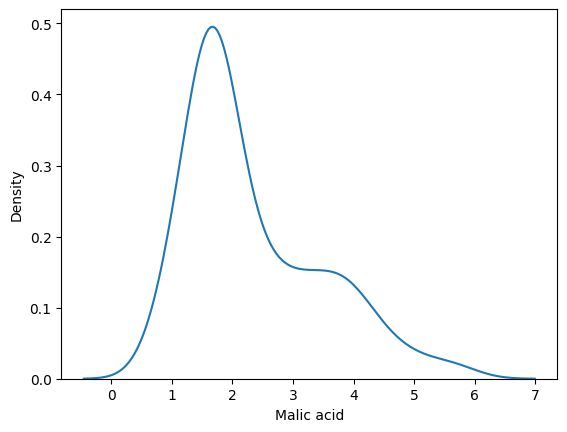

In [12]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

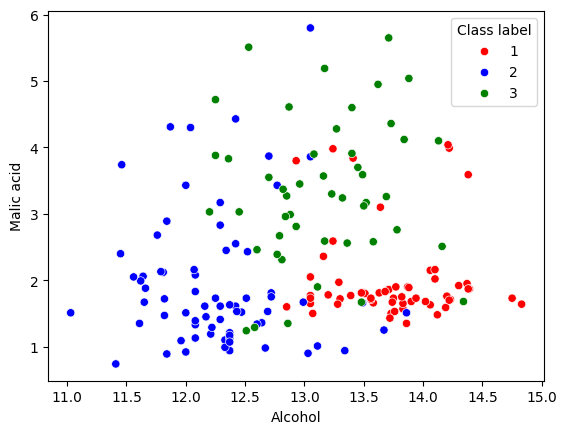

In [14]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(df.drop('Class label',axis = 1),
                                                  df['Class label'],
                                                  test_size = 0.3,
                                                  random_state =0)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_1 = scaler.transform(X_train)
X_test_1 = scaler.transform(X_test)


In [21]:
X_train_1 = pd.DataFrame(X_train_1,columns=X_train.columns)
X_test_1 = pd.DataFrame(X_test_1,columns=X_test.columns)

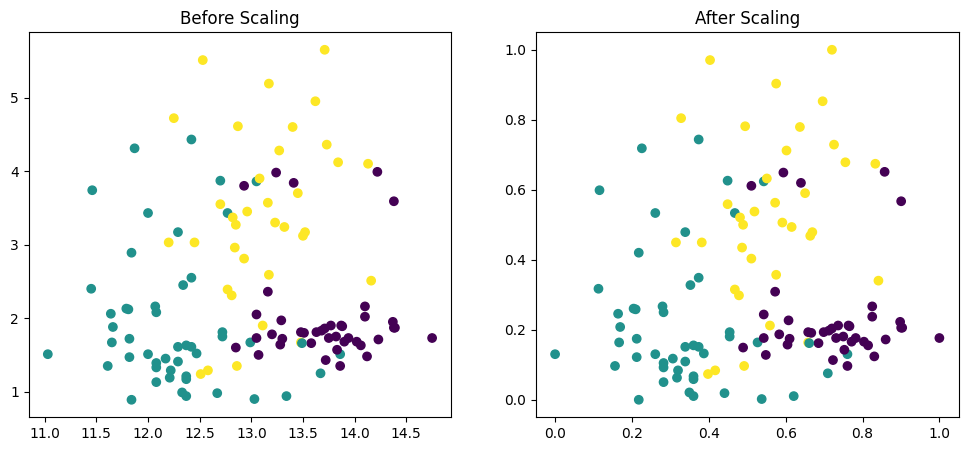

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_1['Alcohol'], X_train_1['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

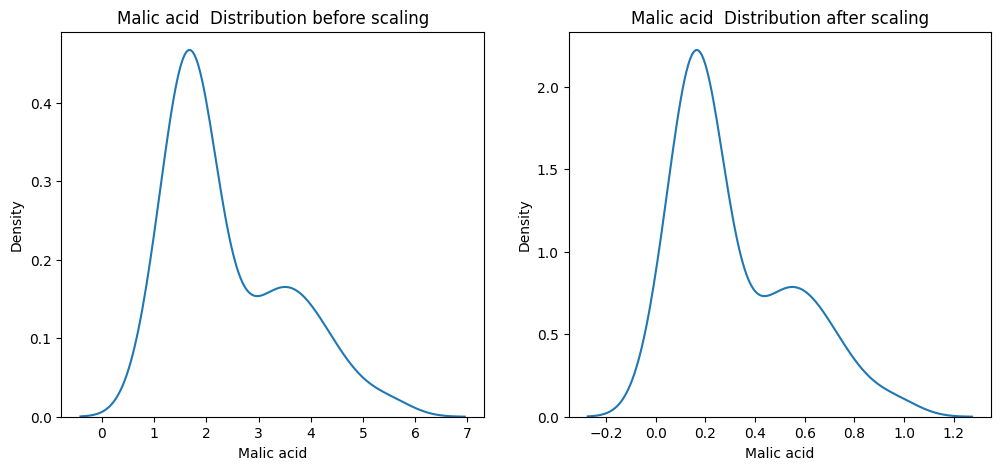

In [26]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Malic acid  Distribution before scaling")
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title("Malic acid  Distribution after scaling")

sns.kdeplot(X_train_1['Malic acid'], ax=ax2)
plt.show()